# jobflow

In [1]:
import subprocess
import os
from pydantic import BaseModel, Field

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from ase.build import bulk
from ase.io import write

In [4]:
from adis_tools.parsers import parse_pw

In [5]:
def generate_structures(structure, strain_lst): 
    structure_lst = []
    for strain in strain_lst:
        structure_strain = structure.copy()
        structure_strain.set_cell(
            structure_strain.cell * strain**(1/3), 
            scale_atoms=True
        )
        structure_lst.append(structure_strain)
    return structure_lst

In [6]:
def plot_energy_volume_curve(volume_lst, energy_lst):
    plt.plot(volume_lst, energy_lst)
    plt.xlabel("Volume")
    plt.ylabel("Energy")
    plt.savefig("evcurve.png")

In [7]:
def write_input(input_dict, working_directory="."):
    filename = os.path.join(working_directory, 'input.pwi')
    os.makedirs(working_directory, exist_ok=True)
    write(
        filename=filename, 
        images=input_dict["structure"], 
        Crystal=True, 
        kpts=input_dict["kpts"], 
        input_data={
            'calculation': input_dict["calculation"],
            'occupations': 'smearing',
            'degauss': input_dict["smearing"],
        }, 
        pseudopotentials=input_dict["pseudopotentials"],
        tstress=True, 
        tprnfor=True
    )

In [8]:
def collect_output(working_directory="."):
    output = parse_pw(os.path.join(working_directory, 'pwscf.xml'))
    return {
        "structure": output['ase_structure'],
        "energy": output["energy"],
        "volume": output['ase_structure'].get_volume(),
    }

In [9]:
from pymatgen.io.core import InputSet, InputGenerator
from pymatgen.io.ase import MSONAtoms
from typing import Any, Optional, Union
QE_CMD= "mpirun -np 1 pw.x -in input.pwi > output.pwo"
def run_qe(qe_cmd=QE_CMD):
    subprocess.check_output(qe_cmd, shell=True, universal_newlines=True)

class QETaskDoc(BaseModel):
    structure: Optional[MSONAtoms] = Field(None, description="ASE structure")
    energy: Optional[float] = Field(None, description="DFT energy in eV")
    volume: Optional[float] = Field(None, description="volume in Angstrom^3")
    
    @classmethod
    def from_directory(cls, working_directory):
        output=collect_output(working_directory=working_directory)
        # structure object needs to be serializable, i.e., we need an additional transformation
        return cls(structure=MSONAtoms(output["structure"]), energy=output["energy"], volume=output["volume"])

class QEInputSet(InputSet):
    """
    Writes an input based on an input_dict
    """
    def __init__(self, input_dict):
        self.input_dict = input_dict

    def write_input(self, working_directory="."):
        write_input(self.input_dict, working_directory=working_directory)

from dataclasses import dataclass, field



@dataclass
class QEInputGenerator(InputGenerator):
    pseudopotentials: dict = field(default_factory=lambda: {"Al": "Al.pbe-n-kjpaw_psl.1.0.0.UPF"})
    kpts: tuple = (3,3,3)
    calculation: str = "vc-relax"
    smearing: float = 0.02
    

    def get_input_set(self, structure) -> QEInputSet:

        input_dict={"structure":structure,
            "pseudopotentials":self.pseudopotentials, 
            "kpts": self.kpts,
            "calculation": self.calculation,
            "smearing": self.smearing,
                    }
        return QEInputSet(input_dict=input_dict)

@dataclass
class QEInputStaticGenerator(QEInputGenerator):
    calculation: str = "scf"

   
def write_qe_input_set(structure, input_set_generator=QEInputGenerator(), working_directory="."):
    qis = input_set_generator.get_input_set(structure=structure)
    qis.write_input(working_directory=working_directory)
    
    

2024-04-04 15:55:32,815 INFO Started executing jobs locally
2024-04-04 15:55:32,892 INFO Starting job - base qe job (72ab2547-8a66-4dd0-a95a-b6255a668cd8)


[jupyter-jan-2djanssen-2dqua-2dsso-5fpyiron-5fbase-2d4ksucf2d:00139] mca_base_component_repository_open: unable to open mca_btl_openib: librdmacm.so.1: cannot open shared object file: No such file or directory (ignored)
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG


2024-04-04 15:56:37,395 INFO Finished job - base qe job (72ab2547-8a66-4dd0-a95a-b6255a668cd8)
2024-04-04 15:56:37,396 INFO Starting job - get_ev_curve (87ad6b9b-9f34-463e-b705-1ab7cdcf9aee)
2024-04-04 15:56:37,404 INFO Finished job - get_ev_curve (87ad6b9b-9f34-463e-b705-1ab7cdcf9aee)
2024-04-04 15:56:37,406 INFO Starting job - static qe job (b0759785-155b-4e79-9b72-c626067d81e1)


[jupyter-jan-2djanssen-2dqua-2dsso-5fpyiron-5fbase-2d4ksucf2d:00149] mca_base_component_repository_open: unable to open mca_btl_openib: librdmacm.so.1: cannot open shared object file: No such file or directory (ignored)


2024-04-04 15:56:45,563 INFO Finished job - static qe job (b0759785-155b-4e79-9b72-c626067d81e1)
2024-04-04 15:56:45,564 INFO Starting job - static qe job (514079e9-d6ae-4369-8b80-bf8ca7860540)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG
[jupyter-jan-2djanssen-2dqua-2dsso-5fpyiron-5fbase-2d4ksucf2d:00159] mca_base_component_repository_open: unable to open mca_btl_openib: librdmacm.so.1: cannot open shared object file: No such file or directory (ignored)
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG


2024-04-04 15:56:53,979 INFO Finished job - static qe job (514079e9-d6ae-4369-8b80-bf8ca7860540)
2024-04-04 15:56:53,980 INFO Starting job - static qe job (6e3c5a28-4edb-4244-9e35-0b8733b946c4)


[jupyter-jan-2djanssen-2dqua-2dsso-5fpyiron-5fbase-2d4ksucf2d:00169] mca_base_component_repository_open: unable to open mca_btl_openib: librdmacm.so.1: cannot open shared object file: No such file or directory (ignored)


2024-04-04 15:57:03,600 INFO Finished job - static qe job (6e3c5a28-4edb-4244-9e35-0b8733b946c4)
2024-04-04 15:57:03,600 INFO Starting job - static qe job (980b72a5-fbea-445c-9075-a880322c8261)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG
[jupyter-jan-2djanssen-2dqua-2dsso-5fpyiron-5fbase-2d4ksucf2d:00179] mca_base_component_repository_open: unable to open mca_btl_openib: librdmacm.so.1: cannot open shared object file: No such file or directory (ignored)


2024-04-04 15:57:14,907 INFO Finished job - static qe job (980b72a5-fbea-445c-9075-a880322c8261)
2024-04-04 15:57:14,908 INFO Starting job - static qe job (a44a935f-6bd2-4279-bbcb-53d5ed890a99)


Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG
[jupyter-jan-2djanssen-2dqua-2dsso-5fpyiron-5fbase-2d4ksucf2d:00189] mca_base_component_repository_open: unable to open mca_btl_openib: librdmacm.so.1: cannot open shared object file: No such file or directory (ignored)
Note: The following floating-point exceptions are signalling: IEEE_INVALID_FLAG


2024-04-04 15:57:27,174 INFO Finished job - static qe job (a44a935f-6bd2-4279-bbcb-53d5ed890a99)
2024-04-04 15:57:27,174 INFO Starting job - store_inputs (87ad6b9b-9f34-463e-b705-1ab7cdcf9aee, 2)
2024-04-04 15:57:27,176 INFO Finished job - store_inputs (87ad6b9b-9f34-463e-b705-1ab7cdcf9aee, 2)
2024-04-04 15:57:27,176 INFO Starting job - plot_energy_volume_curve_job (9987ab9f-1ae9-4172-8e31-b2c9920d4791)
2024-04-04 15:57:27,256 INFO Finished job - plot_energy_volume_curve_job (9987ab9f-1ae9-4172-8e31-b2c9920d4791)
2024-04-04 15:57:27,256 INFO Finished executing jobs locally


{'72ab2547-8a66-4dd0-a95a-b6255a668cd8': {1: Response(output=QETaskDoc(structure=MSONAtoms(symbols='Al4', pbc=True, cell=[4.045218941837687, 4.045218941837687, 4.045218941837687]), energy=-1074.9365272693506, volume=66.1951387021735), detour=None, addition=None, replace=None, stored_data=None, stop_children=False, stop_jobflow=False)},
 '87ad6b9b-9f34-463e-b705-1ab7cdcf9aee': {1: Response(output=None, detour=None, addition=None, replace=Flow(name='Flow', uuid='0e46d480-7699-4e03-889b-b4ba65fe3d38')
  1. Job(name='static qe job', uuid='b0759785-155b-4e79-9b72-c626067d81e1')
  2. Job(name='static qe job', uuid='514079e9-d6ae-4369-8b80-bf8ca7860540')
  3. Job(name='static qe job', uuid='6e3c5a28-4edb-4244-9e35-0b8733b946c4')
  4. Job(name='static qe job', uuid='980b72a5-fbea-445c-9075-a880322c8261')
  5. Job(name='static qe job', uuid='a44a935f-6bd2-4279-bbcb-53d5ed890a99')
  6. Job(name='store_inputs', uuid='87ad6b9b-9f34-463e-b705-1ab7cdcf9aee'), stored_data=None, stop_children=False, s

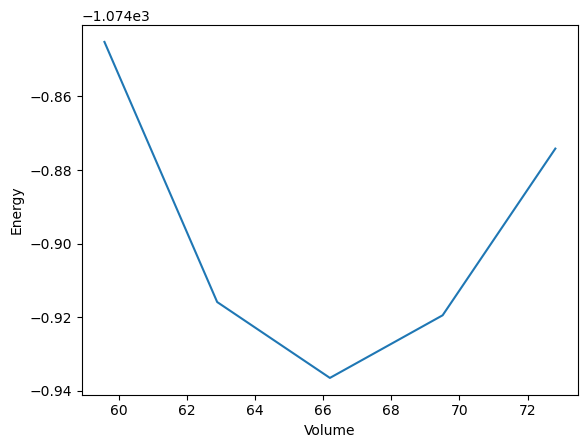

In [10]:
from dataclasses import dataclass, field
from jobflow import job, Maker


@dataclass
class BaseQEMaker(Maker):
    """
    Base QE job maker.

    Parameters
    ----------
    name : str
        The job name.
    input_set_generator : .QEInputGenerator
        A generator used to make the input set.
    """

    name: str = "base qe job"
    input_set_generator: QEInputGenerator = field(default_factory=QEInputGenerator)

    @job(output_schema=QETaskDoc)
    def make(
        self, structure
    ) -> QETaskDoc:
        """
        Run a QE calculation.

        Parameters
        ----------
        structure : MSONAtoms|Atoms
            An Atoms or MSONAtoms object.
            
        Returns
        -------
            Output of a QE calculation
        """
        # copy previous inputs

        # write qe input files
        write_qe_input_set(
            structure=structure, input_set_generator=self.input_set_generator)

        # qe
        run_qe()

        # parse qe outputs
        task_doc=QETaskDoc.from_directory(".")
        
        return task_doc

@dataclass
class StaticQEMaker(BaseQEMaker):
    """
    Base QE job maker.

    Parameters
    ----------
    name : str
        The job name.
    input_set_generator : .QEInputGenerator
        A generator used to make the input set.
    """

    name: str = "static qe job"
    input_set_generator: QEInputGenerator = field(default_factory=QEInputStaticGenerator)



from jobflow import job, Response, Flow, run_locally

@job
def get_ev_curve(structure, strain_lst):
    structures=generate_structures(structure,strain_lst=strain_lst)
    jobs = []
    volumes = []
    energies = []
    for istructure in range(len(strain_lst)):
        new_job = StaticQEMaker().make(structures[istructure])
        jobs.append(new_job)
        volumes.append(new_job.output.volume)
        energies.append(new_job.output.energy)
    return Response(replace=Flow(jobs, output={"energies": energies, "volumes": volumes}))
    
@job
def plot_energy_volume_curve_job(volume_lst, energy_lst):
    plot_energy_volume_curve(volume_lst=volume_lst, energy_lst=energy_lst)

structure = bulk('Al', a=4.15, cubic=True)
relax = BaseQEMaker().make(structure=MSONAtoms(structure))
ev_curve = get_ev_curve(relax.output.structure, strain_lst=np.linspace(0.9, 1.1, 5))
plot = plot_energy_volume_curve_job(volume_lst=ev_curve.output["volumes"], energy_lst=ev_curve.output["energies"])
jobs = [relax, ev_curve, plot]
run_locally(Flow(jobs), create_folders=True)